# **Drug Classification Prediction**
The models used are:

wulan & aliza tinggal pilih yang mana

*   Linear Logistic Regression
*   K Neighbours
*   Linear Support Vector Machine (SVM)
*   Naive Bayes (Categorical)
*   Decision Tree
*   Random Forest





# **Import Library**

In [28]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [5]:
# read file
df = pd.read_csv('drug200.csv') 
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


### Remove Missing Data
- Menghapus baris yang mengandung missing data/ missing value , dengan menetapkan axis = 0

In [9]:
# Drop row with missing value
df = df.dropna(axis=0)
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


- Menghapus kolom yang mengandung missing data/ missing value , dengan menetapkan axis = 1

In [27]:
# Drop column with missing value
df = df.dropna(axis=1)
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [13]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB
None


## Dari hasil di atas, tidak ada nilai yang hilang (*missing*) dalam dataset ini

# **Eksplorasi Data**

## *Kategori Kolom*

In [ ]:
#Kolom Umur (Age of the Patient)
df.Age.value_counts()

In [ ]:
#Kolom Jenis Kelamin (Sex, Gender of the patients)
df.Sex.value_counts()

In [ ]:
#Kolom Tekanan Darah (Blood Pressure Levels)
df.Bp.value_counts()

In [ ]:
#Kolom Kolesterol (Cholesterol Levels)
df.Cholesterol.value_counts()

In [ ]:
#Kolom Na_to_K/Natrium ke Potasium (Sodium to potassium Ration in Blood)
df.Na_to_K.value_counts()

In [ ]:
#Kolom Drug
df.Drug.value_counts()

# **Describe Data**

In [8]:
df.describe() # Hanya menjalankan kolom dengan data numerik

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [9]:
skewAge = df.Age.skew(axis = 0, skipna = True)
print('Age skewness: ', skewAge)

Age skewness:  0.03030835703000607


In [24]:
skewNatoK = df.Na_to_K.skew(axis = 0, skipna = True)
print('Na to K skewness: ', skewNatoK)

Na to K skewness:  1.039341186028881


C:\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

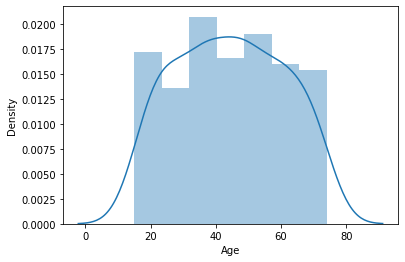

In [22]:
sns.distplot(df['Age'])

C:\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Na_to_K', ylabel='Density'>

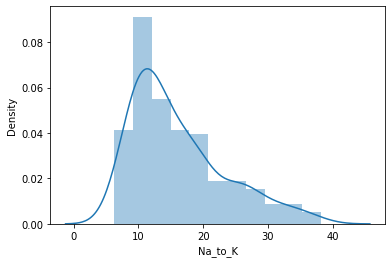

In [25]:
sns.distplot(df['Na_to_K'])

## Distribusi kolom 'Age' adalah simetris, karena nilai skewness antara -0,5 dan 0,5 Distribusi kolom 'Na_to_K' cukup miring, karena nilai skewness antara 0,5 dan 1. Dapat juga dilihat pada histogram kolom 'Na_to_K'